In [1]:
import h5py
import numpy as np
from scipy.signal import welch, get_window
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [22, 10]
f = h5py.File('../../test/isotropic1024coarse.h5', 'r')
dkeys = list(f.keys())
dkeys[0]
dkeys[-4]
f['Velocity_0001']

'Velocity_0001'

'Velocity_1256'

<HDF5 dataset "Velocity_0001": shape (1, 1, 1, 3), type "<f4">

In [2]:
cos = [f"Velocity_0{str(i).zfill(3)}" for i in range(1, 502)]
dss = f.get('Velocity_0001')

In [3]:
uvw = np.zeros([1024, 3])
for i, s  in enumerate(cos):
   uvw[i] = f[s][0, 0, 0]

u = uvw[:, 0]
v = uvw[:, 1]
len(u)

1024

In [4]:
# wavelength (l in m) to wavenumber (k in rad * m^-1)
def l_to_k(l):
    return np.pi*2/l

def k_to_l(k):
    return np.pi*2/k

<AxesSubplot:xlabel='f in Hz', ylabel='E(f)'>

/var/folders/nj/3cky8n354l582_mtxq75gprr0000gn/T/ipykernel_19520/206340019.py:11: RuntimeWarning: divide by zero encountered in power
  y_power_law = freqs**(-5/3) * 0.01


<AxesSubplot:xlabel='f in Hz', ylabel='E(f)'>

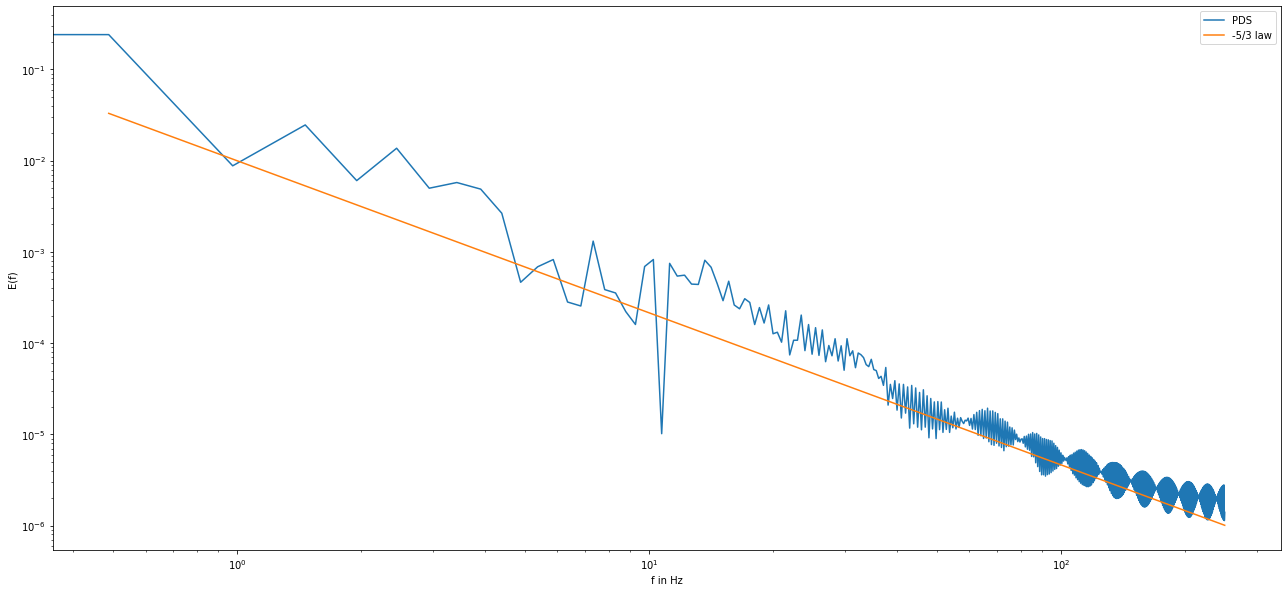

In [29]:

dt = 0.002
fs = 1/dt
L = 1024
T = dt * L

window = get_window('boxcar', L) 
freqs, power = welch(u, fs=fs, noverlap=0, window=window, 
                     nperseg=L, nfft=L, detrend=False, average='mean')

pd.Series(power, index=freqs).plot(loglog=True, label='PDS', ylabel=('E(f)'), xlabel='f in Hz')
y_power_law = freqs**(-5/3) * 0.01
pd.Series(y_power_law, index=freqs).plot(loglog=True, label=r'-5/3 law')
plt.legend()

<AxesSubplot:xlabel='k', ylabel='E(k)'>

/var/folders/nj/3cky8n354l582_mtxq75gprr0000gn/T/ipykernel_19520/943233319.py:3: RuntimeWarning: divide by zero encountered in power
  y_power_law = freqs**(-5/3) * 0.01


<AxesSubplot:xlabel='k', ylabel='E(k)'>

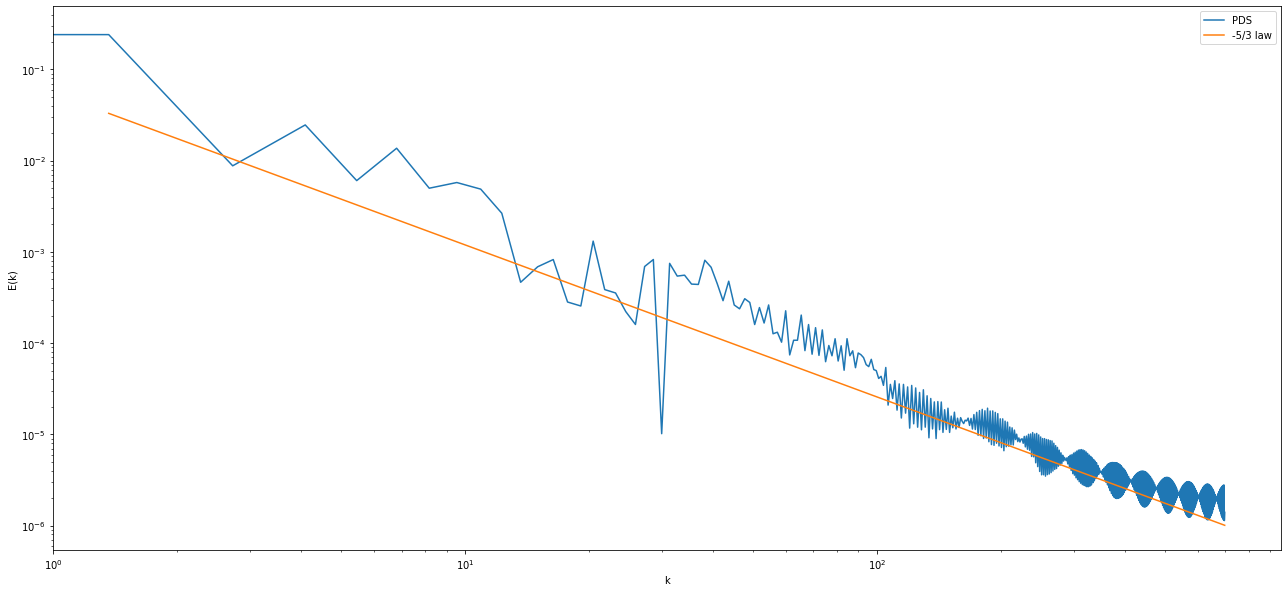

In [26]:
ks = freqs / np.mean(u)
pd.Series(power, index=ks).plot(loglog=True, label='PDS', ylabel=('E(k)'), xlabel='k')
y_power_law = freqs**(-5/3) * 0.01
pd.Series(y_power_law, index=ks).plot(loglog=True, label=r'-5/3 law')
plt.legend()

In [6]:
print(f'Sampling Rate: {fs}Hz')
fs_max = fs/2
U = np.mean(u)
print(f'Highest resolved frequency: {fs_max}')
print(f'Highest resolved wavenumber (k): {fs_max / U:.2f} m^-1')
print(f'Smallest resolved wavelength: {k_to_l(fs_max / U):.4f} m')
df = 1/T # frequency resolution see https://www.researchgate.net/post/How_to_plot_Velocity_Power_Spectra_v_s_Frequency_for_Turbulence_Characterisation
print(f'Frequencty Resolution/Lowest resolved frequency: {df}Hz')
print(f'Lowest resolved wavenumber (k): {df / U:.2f} m^-1')
print(f'Highest resolved wavelength: {k_to_l(df / U):.4f} m')

Sampling Rate: 500.0Hz
Highest resolved frequency: 250.0
Highest resolved wavenumber (k): 697.38 m^-1
Smallest resolved wavelength: 0.0090 m
Frequencty Resolution/Lowest resolved frequency: 0.48828125Hz
Lowest resolved wavenumber (k): 1.36 m^-1
Highest resolved wavelength: 4.6130 m
